In [1]:
"""
S = np.exp(-naf.cumulative_hazard_)
print("\nMean: " + str(lf.utils.restricted_mean_survival_time(S)))
print("Median: " + str(lf.utils.median_survival_times(S)) + "\n")
"""

'\nS = np.exp(-naf.cumulative_hazard_)\nprint("\nMean: " + str(lf.utils.restricted_mean_survival_time(S)))\nprint("Median: " + str(lf.utils.median_survival_times(S)) + "\n")\n'

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from lifelines import *
import lifelines as lf

In [3]:
df = pd.read_csv('ske_data.csv', sep=';', encoding='UTF-8')

In [4]:
df

,treat,cell,survt,cens,KAR,ddure,age,prith
0,1,1,72,1,60,7,69,0
1,1,1,411,1,70,5,64,10
2,1,1,228,1,60,3,38,0
3,1,1,126,1,60,9,63,10
4,1,1,118,1,70,11,65,10
...,...,...,...,...,...,...,...,...
130,2,4,133,1,75,1,65,0
131,2,4,111,1,60,5,64,0
132,2,4,231,1,70,18,67,10
133,2,4,378,1,80,4,65,0


In [5]:
df_test = df[df["treat"]==1]["survt"]

In [6]:
df_test

0      72
1     411
2     228
3     126
4     118
     ... 
63    143
64    105
65    103
66    250
67    100
Name: survt, Length: 68, dtype: int64

In [7]:
np.mean(df_test==df_treat1["survt"])

NameError: name 'df_treat1' is not defined

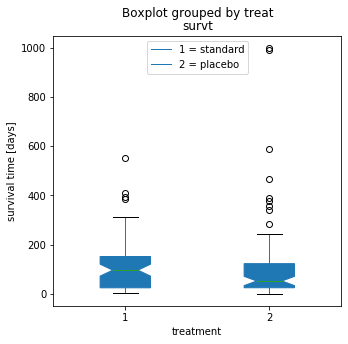

In [8]:
bd = df.boxplot(column="survt", by="treat", grid=False, notch=True,  widths=0.35, \
           patch_artist=True, figsize=(5,5))
bd.set_xlabel("treatment")
bd.set_ylabel("survival time [days]")
bd.legend( ['1 = standard', '2 = placebo'], loc='upper center')

    

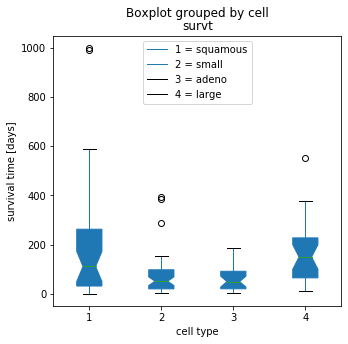

In [158]:
bd = df.boxplot(column="survt", by="cell", grid=False, notch=True,  widths=0.35, \
           patch_artist=True, figsize=(5,5))
bd.set_xlabel("cell type")
bd.set_ylabel("survival time [days]")
bd.legend(['1 = squamous', '2 = small','3 = adeno', '4 = large' ], loc='upper center')


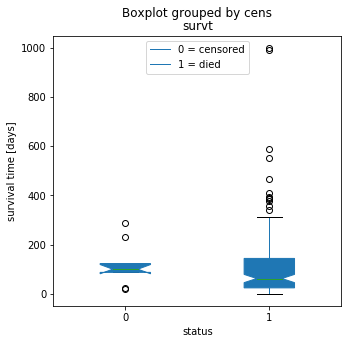

In [10]:
bd = df.boxplot(column="survt", by="cens", grid=False, notch=True, widths=0.35, \
           patch_artist=True, figsize=(5,5))
bd.set_xlabel("status")
bd.set_ylabel("survival time [days]")
bd.legend( ['0 = censored', '1 = died'], loc='upper center')


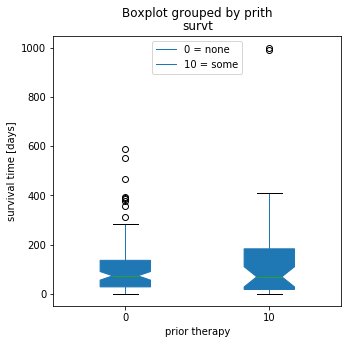

In [11]:
bd = df.boxplot(column="survt", by="prith", grid=False, notch=True, widths=0.35, \
           patch_artist=True, figsize=(5,5))
bd.set_xlabel("prior therapy")
bd.set_ylabel("survival time [days]")
bd.legend( ['0 = none', '10 = some'], loc='upper center')


Text(0, 0.5, 'survival time [days]')

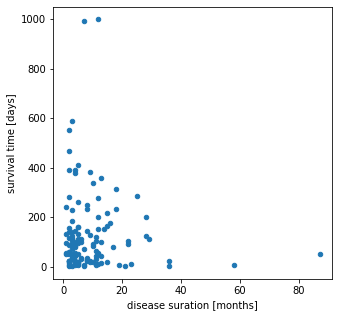

In [12]:
bd = df.plot.scatter(y="survt", x="ddure", figsize=(5,5))
bd.set_xlabel("disease suration [months]")
bd.set_ylabel("survival time [days]")

Text(0, 0.5, 'survival time [days]')

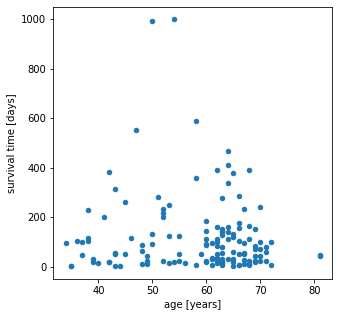

In [13]:
bd = df.plot.scatter(y="survt", x="age", figsize=(5,5))
bd.set_xlabel("age [years]")
bd.set_ylabel("survival time [days]")

Text(0, 0.5, 'survival time [days]')

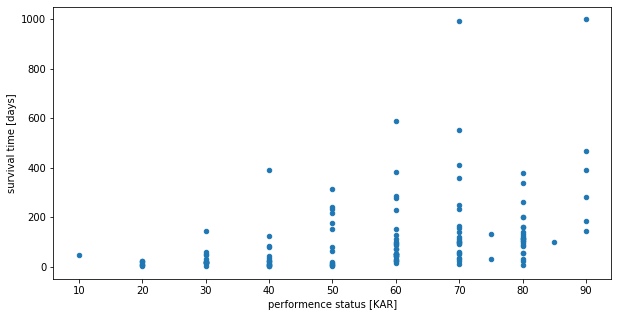

In [14]:
bd = df.plot.scatter(y="survt", x="KAR", figsize=(10,5))
bd.set_xlabel("performence status [KAR]")
bd.set_ylabel("survival time [days]")

# Modelování
## skupina treatment 1 vs placebo

In [15]:
df_treat1 = df.loc[df["treat"]==1]
df_treat2 = df.loc[df["treat"]==2]

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a1f979050>]],
      dtype=object)

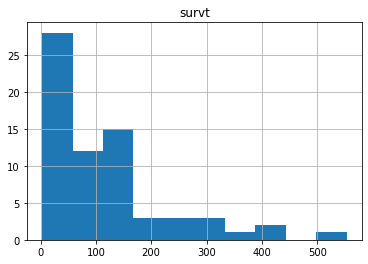

In [16]:
df_treat1.hist("survt")

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a1fd7a2d0>]],
      dtype=object)

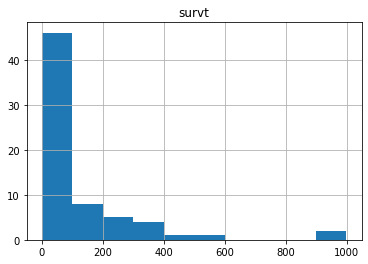

In [17]:
df_treat2.hist("survt")

In [18]:
kmf1 = lf.KaplanMeierFitter()
kmf1.fit(df_treat1["survt"], label='treatment 1')

<lifelines.KaplanMeierFitter: fitted with 68 total observations, 0 right-censored observations>

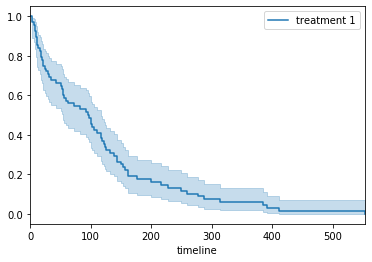

In [19]:
kmf1.plot_survival_function()

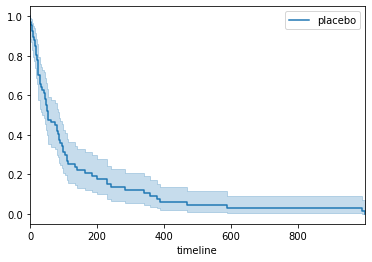

In [20]:
kmf2 = lf.KaplanMeierFitter()
kmf2.fit(df_treat2["survt"], label='placebo')
kmf2.plot_survival_function()

/bin/sh: ix: command not found


103.0
119.91045382962467
52.0
130.8941910447762


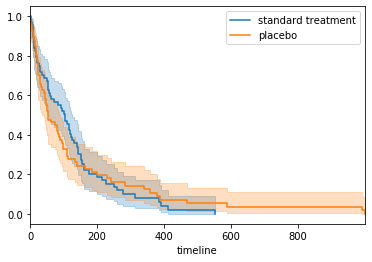

In [152]:
groups = df['treat']
ix = (groups == 1)

kmf = lf.KaplanMeierFitter()
kmf.fit(df["survt"][ix], df["cens"][ix], label='standard treatment')
ax = kmf.plot()
print(kmf.median_survival_time_)
print(lf.utils.restricted_mean_survival_time(kmf.survival_function_))

kmf.fit(df["survt"][~ix], df["cens"][~ix], label='placebo')
ax = kmf.plot(ax=ax)
print(kmf.median_survival_time_)
print(lf.utils.restricted_mean_survival_time(kmf.survival_function_))

In [147]:
print(lf.utils.restricted_mean_survival_time(kmf))
print(lf.utils.restricted_mean_survival_time(kmf.survival_function_))

139.84697910447767
130.8941910447762


In [151]:
#print(lf.utils.median_survival_times(kmf))
print(lf.utils.median_survival_times(kmf.survival_function_))

52.0



Mean: 123.88065752958812
Median: 103.0


Mean: 138.4170122011014
Median: 52.0



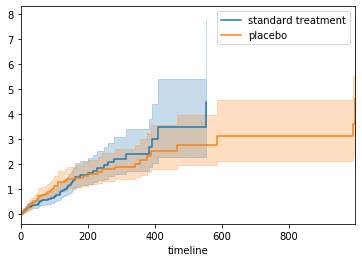

In [134]:
naf = lf.NelsonAalenFitter()

naf.fit(df["survt"][ix], df["cens"][ix], label='standard treatment')
ax = naf.plot_cumulative_hazard()

S = np.exp(-naf.cumulative_hazard_)
print("\nMean: " + str(lf.utils.restricted_mean_survival_time(S)))
print("Median: " + str(lf.utils.median_survival_times(S)) + "\n")


naf.fit(df["survt"][~ix], df["cens"][~ix], label='placebo')
ax = naf.plot_cumulative_hazard(ax=ax)
S = np.exp(-naf.cumulative_hazard_)
print("\nMean: " + str(lf.utils.restricted_mean_survival_time(S)))
print("Median: " + str(lf.utils.median_survival_times(S)) + "\n")

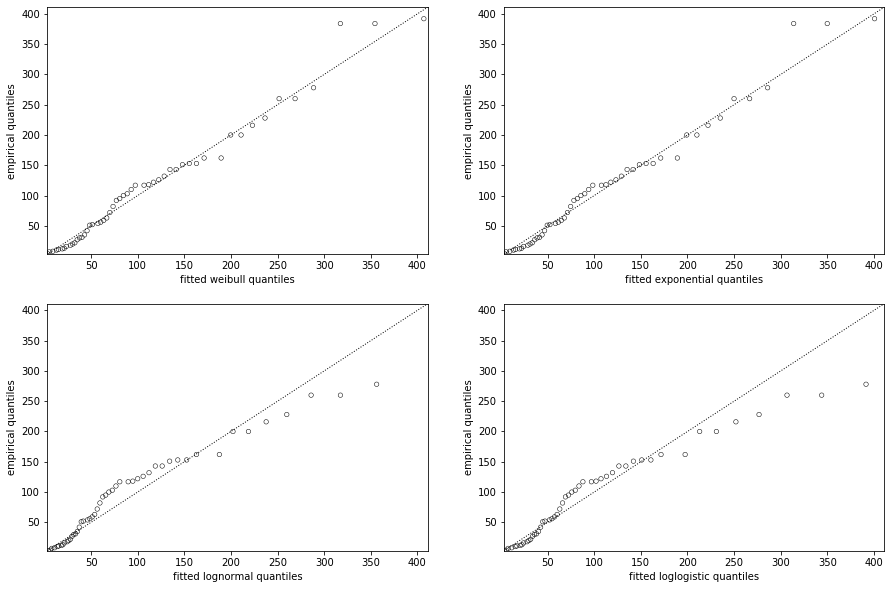

In [90]:
fig, axes = plt.subplots(2, 2, figsize=(15, 10))
axes = axes.reshape(4,)


for i, model in enumerate([lf.WeibullFitter(), lf.ExponentialFitter(), lf.LogNormalFitter(), lf.LogLogisticFitter()]):
    model.fit(df_treat1["survt"], df_treat1["cens"])
    lf.plotting.qq_plot(model, ax=axes[i])


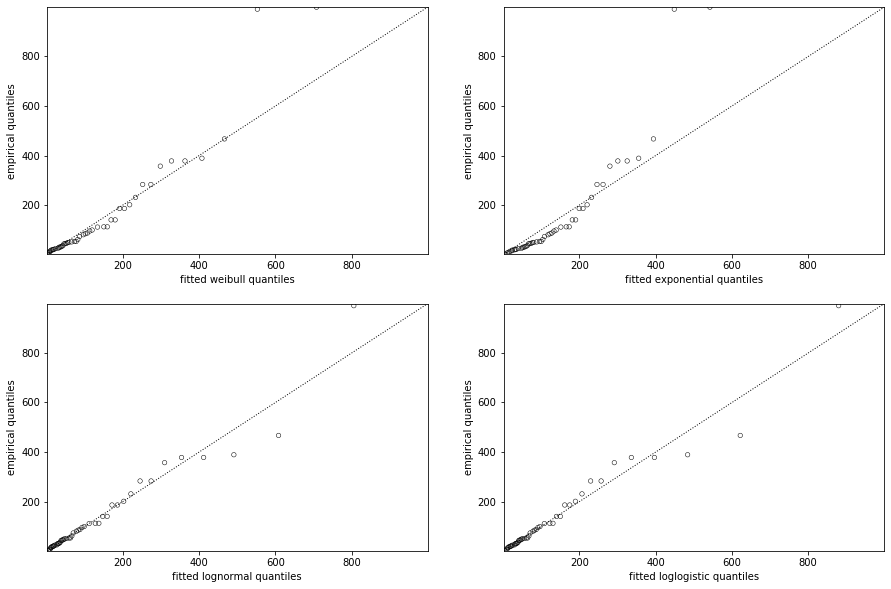

In [91]:
fig, axes = plt.subplots(2, 2, figsize=(15, 10))
axes = axes.reshape(4,)


for i, model in enumerate([lf.WeibullFitter(), lf.ExponentialFitter(), lf.LogNormalFitter(), lf.LogLogisticFitter()]):
    model.fit(df_treat2["survt"], df_treat2["cens"])
    lf.plotting.qq_plot(model, ax=axes[i])

               coef   se(coef)  lower 0.95  upper 0.95         p  -log2(p)
lambda_  124.451914  16.620807   91.875731  157.028098  0.469993  1.089290
rho_       0.982079   0.098363    0.789292    1.174866  0.855428  0.225281
85.68846502471129
123.74895534992183
            coef  se(coef)  lower 0.95  upper 0.95         p   -log2(p)
mu_     4.051418  0.180234    3.698165    4.404671  0.578347   0.789993
sigma_  1.466016  0.130246    1.210738    1.721293  0.000346  11.495786
57.47891029749166
141.2089299583528


/Users/Ghosty/miniconda3/envs/Pytorch/lib/python3.7/site-packages/lifelines/utils/__init__.py:268: ApproximationWarning: Approximating RMST using the precomputed survival function. You likely will get a more accurate estimate if you provide the fitted Model instead of the survival function.
  ApproximationWarning,
/Users/Ghosty/miniconda3/envs/Pytorch/lib/python3.7/site-packages/lifelines/utils/__init__.py:268: ApproximationWarning: Approximating RMST using the precomputed survival function. You likely will get a more accurate estimate if you provide the fitted Model instead of the survival function.
  ApproximationWarning,


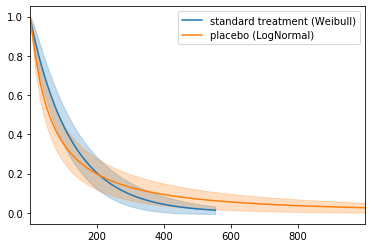

In [157]:
wbf = lf.WeibullFitter()

wbf.fit(df["survt"][ix], df["cens"][ix], label='standard treatment (Weibull)')
ax1 = wbf.plot_survival_function()
print(wbf.summary)
print(wbf.median_survival_time_)
print(lf.utils.restricted_mean_survival_time(wbf.survival_function_))

lntf= lf.LogNormalFitter()
lntf.fit(df["survt"][~ix], df["cens"][~ix], label='placebo (LogNormal)')
ax1 = lntf.plot_survival_function(ax=ax1)
print(lntf.summary)
print(lntf.median_survival_time_)
print(lf.utils.restricted_mean_survival_time(lntf.survival_function_))

77.62138750150712


NameError: name 'treat1' is not defined

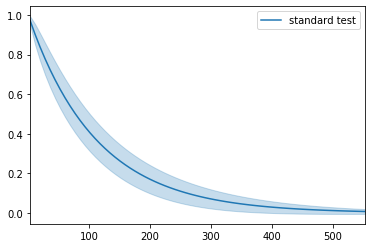

In [75]:
wbf1 = lf.WeibullFitter()

wbf1.fit(df_treat1["survt"], label='standard test')
ax1 = wbf1.plot_survival_function()
print(wbf1.median_survival_time_)

wbf1.fit(treat1, np.ones_like(treat1), label='standart test format ')
ax1 = wbf1.plot_survival_function(ax=ax1)
print(wbf1.median_survival_time_)

In [ ]:
wbf.fit(df["survt"][ix], df["cens"][ix], label='standard treatment')
ax1 = wbf.plot_cumulative_hazard()

wbf.fit(df["survt"][~ix], df["cens"][~ix], label='placebo')
ax1 = wbf.plot_cumulative_hazard(ax=ax1)


              coef   se(coef)  lower 0.95  upper 0.95             p   -log2(p)
lambda_  125.16968  15.891488   94.022936  156.316425  5.557870e-15  47.354389
86.76101094341155
             coef   se(coef)  lower 0.95  upper 0.95         p  -log2(p)
alpha_  59.482143  10.338562   39.218934   79.745353  0.469242  1.091595
beta_    1.221848   0.127629    0.971699    1.471997  0.082172  3.605205
59.48214322425015


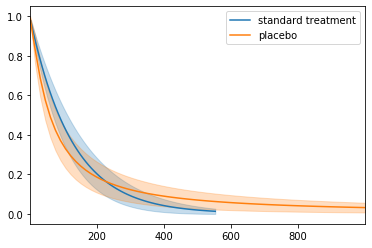

In [96]:
exf = lf.ExponentialFitter()

exf.fit(df["survt"][ix], df["cens"][ix], label='standard treatment')
ax2 = exf.plot_survival_function()
print(exf.summary)
print(exf.median_survival_time_)

llgf = lf.LogLogisticFitter()
llgf.fit(df["survt"][~ix], df["cens"][~ix], label='placebo')
ax2 = llgf.plot_survival_function(ax=ax2)
print(llgf.summary)
print(llgf.median_survival_time_)

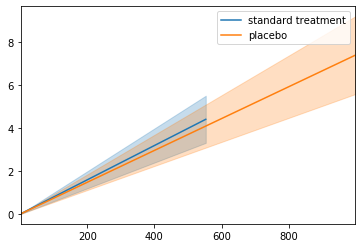

In [76]:
exf.fit(df["survt"][ix], df["cens"][ix], label='standard treatment')
ax2 = exf.plot_cumulative_hazard()

exf.fit(df["survt"][~ix], df["cens"][~ix], label='placebo')
ax2 = exf.plot_cumulative_hazard(ax=ax2)

Text(0, 0.5, 'Cumulative hazard function')

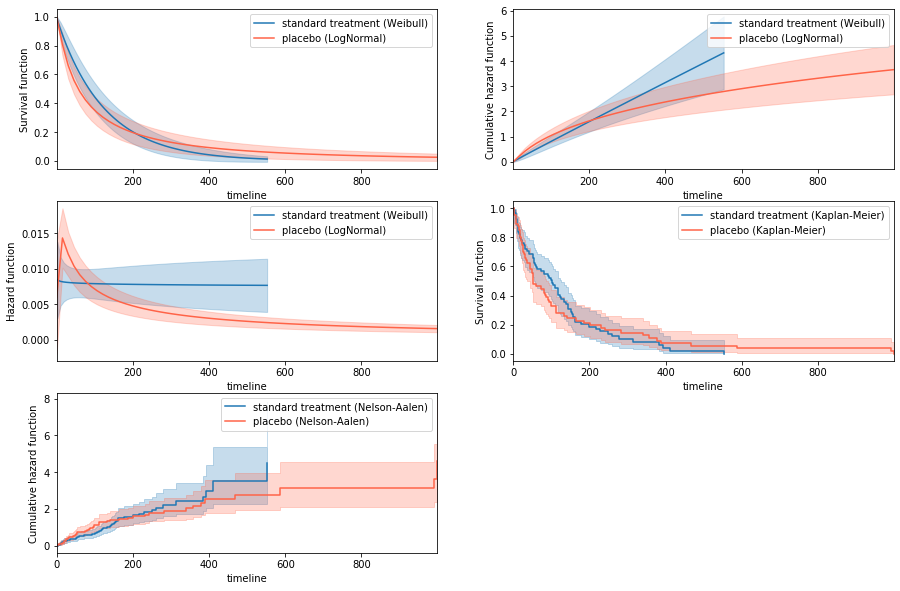

In [132]:
fig, axes = plt.subplots(3, 2, figsize=(15, 10))
axes = axes.reshape(6,)

axes = axes.flat
axes[5].remove()
axes = axes[:5]



wbf.plot_survival_function(ax=axes[0])#lawngreen
lntf.plot_survival_function(ax=axes[0], c="tomato")

wbf.plot_cumulative_hazard(ax=axes[1])
lntf.plot_cumulative_hazard(ax=axes[1],c="tomato")

wbf.plot_hazard(ax=axes[2])
lntf.plot_hazard(ax=axes[2],c="tomato")

axes[0].set_ylabel("Survival function")
axes[1].set_ylabel("Cumulative hazard function")
axes[2].set_ylabel("Hazard function")

axes[0].set_xlabel("timeline")
axes[1].set_xlabel("timeline")
axes[2].set_xlabel("timeline")

kmf = lf.KaplanMeierFitter()
kmf.fit(df["survt"][ix], df["cens"][ix], label='standard treatment (Kaplan-Meier)')
kmf.plot(ax=axes[3])

kmf.fit(df["survt"][~ix], df["cens"][~ix], label='placebo (Kaplan-Meier)')
kmf.plot(ax=axes[3], c="tomato")

naf = lf.NelsonAalenFitter()
naf.fit(df["survt"][ix], df["cens"][ix], label='standard treatment (Nelson-Aalen)')
naf.plot_cumulative_hazard(ax=axes[4])
axes[3].set_ylabel("Survival function")

naf.fit(df["survt"][~ix], df["cens"][~ix], label='placebo (Nelson-Aalen)')
naf.plot_cumulative_hazard(ax=axes[4], c="tomato")
axes[4].set_ylabel("Cumulative hazard function")




In [ ]:
S = np.exp(-naf.cumulative_hazard_)
print("\nMean: " + str(lf.utils.restricted_mean_survival_time(S)))
print("Median: " + str(lf.utils.median_survival_times(S)) + "\n")

# Podle KAR

In [77]:
df_KARl = df.loc[df["KAR"]<=50]
df_KARh = df.loc[df["KAR"]>50]

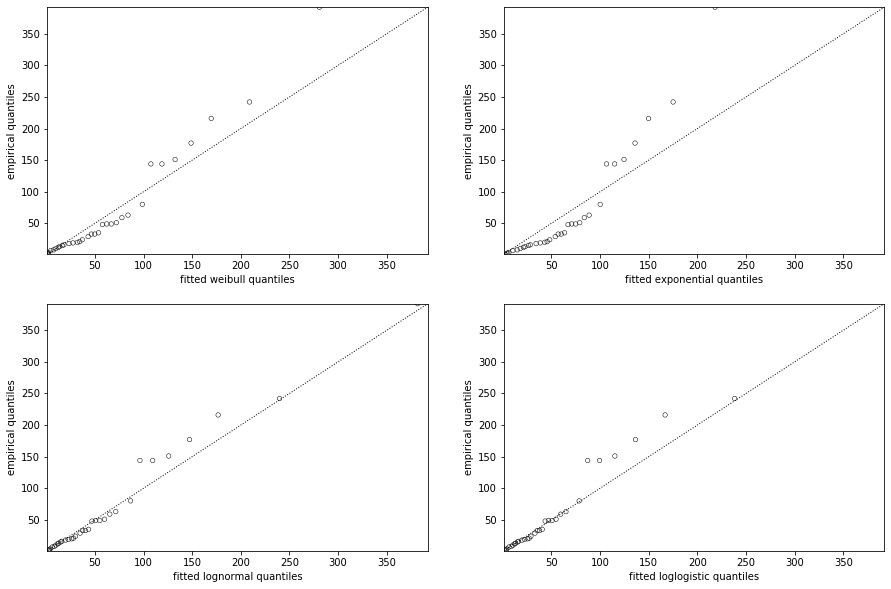

In [159]:
fig, axes = plt.subplots(2, 2, figsize=(15, 10))
axes = axes.reshape(4,)


for i, model in enumerate([lf.WeibullFitter(), lf.ExponentialFitter(), lf.LogNormalFitter(), lf.LogLogisticFitter()]):
    model.fit(df_KARl["survt"], df_KARl["cens"])
    lf.plotting.qq_plot(model, ax=axes[i])

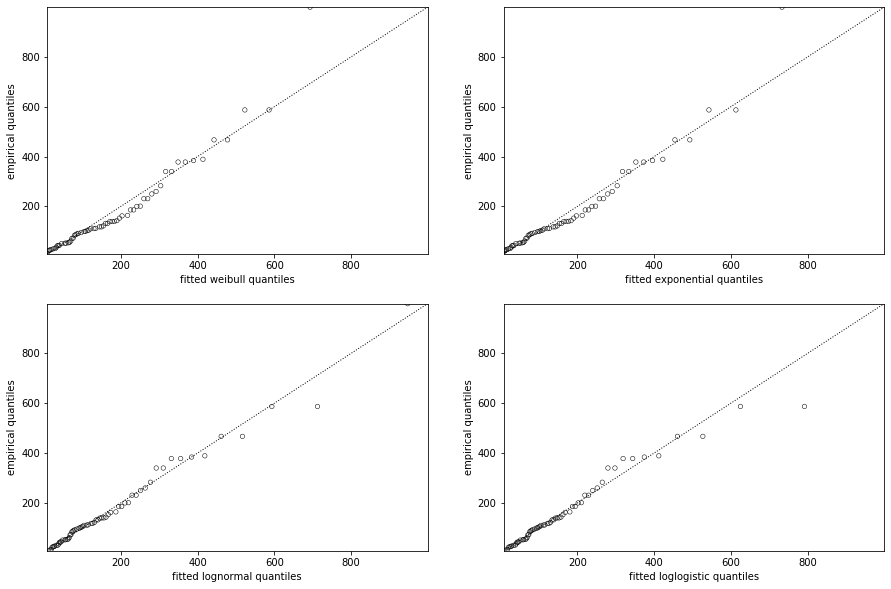

In [160]:
fig, axes = plt.subplots(2, 2, figsize=(15, 10))
axes = axes.reshape(4,)


for i, model in enumerate([lf.WeibullFitter(), lf.ExponentialFitter(), lf.LogNormalFitter(), lf.LogLogisticFitter()]):
    model.fit(df_KARh["survt"], df_KARh["cens"])
    lf.plotting.qq_plot(model, ax=axes[i])

In [78]:
groups = df['KAR']
ix1 = (groups <= 50)

            coef  se(coef)  lower 0.95  upper 0.95         p  -log2(p)
mu_     3.263784  0.199251    2.873259    3.654308  0.221381  2.175394
sigma_  1.425952  0.145349    1.141073    1.710832  0.003384  8.207181
26.148289272433384
60.69115844426418
            coef  se(coef)  lower 0.95  upper 0.95        p  -log2(p)
mu_     4.692742  0.110449    4.476266    4.909218  0.59941  0.738386
sigma_  0.989968  0.079731    0.833698    1.146238  0.89987  0.152212
109.15209489080878
171.89353250278737


/Users/Ghosty/miniconda3/envs/Pytorch/lib/python3.7/site-packages/lifelines/utils/__init__.py:268: ApproximationWarning: Approximating RMST using the precomputed survival function. You likely will get a more accurate estimate if you provide the fitted Model instead of the survival function.
  ApproximationWarning,
/Users/Ghosty/miniconda3/envs/Pytorch/lib/python3.7/site-packages/lifelines/utils/__init__.py:268: ApproximationWarning: Approximating RMST using the precomputed survival function. You likely will get a more accurate estimate if you provide the fitted Model instead of the survival function.
  ApproximationWarning,


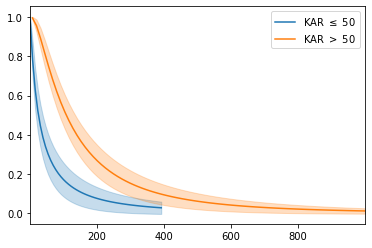

In [166]:
lnf1 = lf.LogNormalFitter()
lnf2 = lf.LogNormalFitter()

lnf1.fit(df["survt"][ix1],df["cens"][ix1],  label='KAR $\leq$ 50')
ax2 = lnf1.plot_survival_function()
print(lnf1.summary)
print(lnf1.median_survival_time_)
print(lf.utils.restricted_mean_survival_time(lnf1.survival_function_))

lnf2.fit(df["survt"][~ix1],df["cens"][~ix1], label='KAR $>$ 50')
ax2 = lnf2.plot_survival_function(ax=ax2)
print(lnf2.summary)
print(lnf2.median_survival_time_)
print(lf.utils.restricted_mean_survival_time(lnf2.survival_function_))

             coef  se(coef)  lower 0.95  upper 0.95         p  -log2(p)
alpha_  25.463243  5.006448   15.650786   35.275700  0.321505  1.637088
beta_    1.229667  0.146752    0.942038    1.517296  0.117583  3.088247
25.46324339592924
              coef   se(coef)  lower 0.95  upper 0.95             p   -log2(p)
alpha_  110.000293  11.973959   86.531764  133.468822  7.745197e-14  43.553691
beta_     1.778017   0.168480    1.447803    2.108231  3.876958e-06  17.976643
110.00029324374734


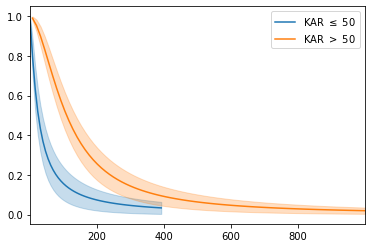

In [167]:
llf = lf.LogLogisticFitter()

llf.fit(df["survt"][ix1], df["cens"][ix1],  label='KAR $\leq$ 50')
ax2 = llf.plot_survival_function()
print(llf.summary)
print(llf.median_survival_time_)

llf.fit(df["survt"][~ix1], df["cens"][~ix1], label='KAR $>$ 50')
ax2 = llf.plot_survival_function(ax=ax2)
print(llf.summary)
print(llf.median_survival_time_)

              coef   se(coef)  lower 0.95  upper 0.95         p  -log2(p)
lambda_  52.255582  10.428684   31.815737   72.695428  0.002226  8.811307
rho_      0.745963   0.079897    0.589367    0.902558  0.001475  9.405037
31.970636285073862
               coef   se(coef)  lower 0.95  upper 0.95         p   -log2(p)
lambda_  179.704114  20.159229  140.192750  219.215478  0.000002  18.835802
rho_       1.068758   0.087672    0.896924    1.240591  0.432884   1.207946
127.5333824883111


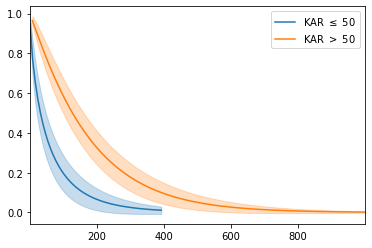

In [168]:
wbf1 = lf.WeibullFitter()

wbf1.fit(df["survt"][ix1], df["cens"][ix1],  label='KAR $\leq$ 50')
ax2 = wbf1.plot_survival_function()
print(wbf1.summary)
print(wbf1.median_survival_time_)

wbf1.fit(df["survt"][~ix1], df["cens"][~ix1], label='KAR $>$ 50')
ax2 = wbf1.plot_survival_function(ax=ax2)
print(wbf1.summary)
print(wbf1.median_survival_time_)

20.0

Mean: 59.91180889423075
111.0

Mean: 166.39201894221307


/Users/Ghosty/miniconda3/envs/Pytorch/lib/python3.7/site-packages/lifelines/utils/__init__.py:268: ApproximationWarning: Approximating RMST using the precomputed survival function. You likely will get a more accurate estimate if you provide the fitted Model instead of the survival function.
  ApproximationWarning,


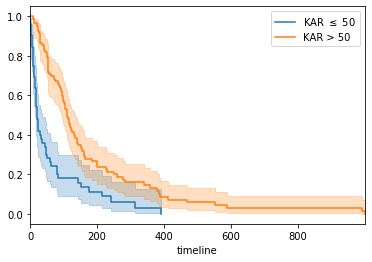

In [169]:
kmf = lf.KaplanMeierFitter()
kmf.fit(df["survt"][ix1], df["cens"][ix1], label='KAR $\leq$ 50')
ax = kmf.plot()
print(kmf.median_survival_time_)
print("\nMean: " + str(lf.utils.restricted_mean_survival_time(kmf.survival_function_)))


kmf.fit(df["survt"][~ix1], df["cens"][~ix1], label='KAR > 50')
ax = kmf.plot(ax=ax)
print(kmf.median_survival_time_)
print("\nMean: " + str(lf.utils.restricted_mean_survival_time(kmf.survival_function_)))


Mean: 63.860576858489985
Median: 21.0


Mean: 172.30413683184156
Median: 111.0



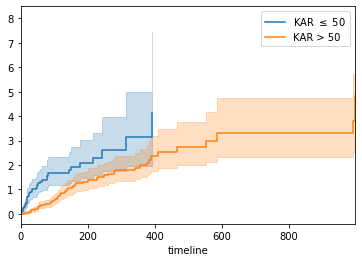

In [170]:
naf = lf.NelsonAalenFitter()

naf.fit(df["survt"][ix1], df["cens"][ix1], label='KAR $\leq$ 50')
ax = naf.plot_cumulative_hazard()
S = np.exp(-naf.cumulative_hazard_)
print("\nMean: " + str(lf.utils.restricted_mean_survival_time(S)))
print("Median: " + str(lf.utils.median_survival_times(S)) + "\n")

naf.fit(df["survt"][~ix1], df["cens"][~ix1], label='KAR > 50')
ax = naf.plot_cumulative_hazard(ax=ax)
S = np.exp(-naf.cumulative_hazard_)
print("\nMean: " + str(lf.utils.restricted_mean_survival_time(S)))
print("Median: " + str(lf.utils.median_survival_times(S)) + "\n")

Text(0, 0.5, 'Cumulative hazard function')

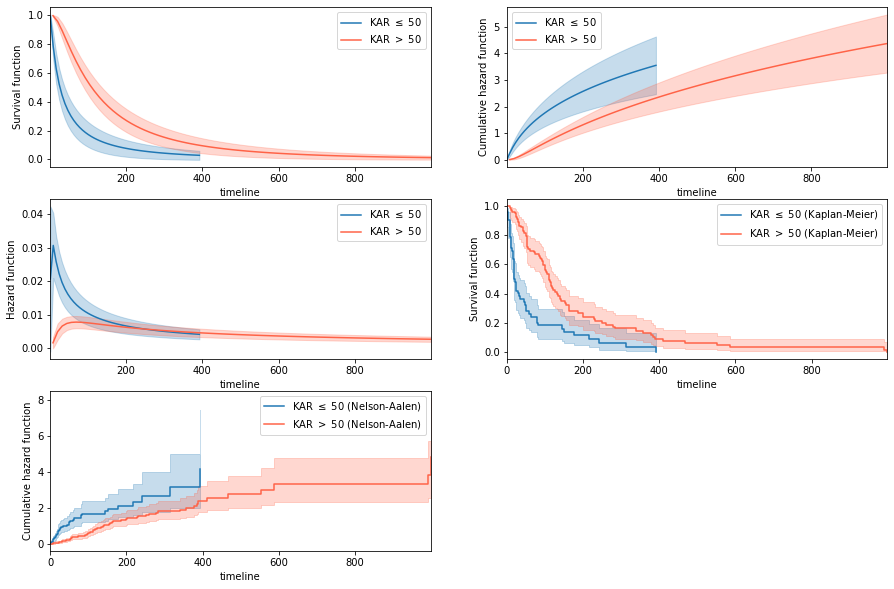

In [171]:
fig, axes = plt.subplots(3, 2, figsize=(15, 10))
axes = axes.reshape(6,)

axes = axes.flat
axes[5].remove()
axes = axes[:5]



lnf1.plot_survival_function(ax=axes[0])#lawngreen
lnf2.plot_survival_function(ax=axes[0], c="tomato")

lnf1.plot_cumulative_hazard(ax=axes[1])
lnf2.plot_cumulative_hazard(ax=axes[1],c="tomato")

lnf1.plot_hazard(ax=axes[2])
lnf2.plot_hazard(ax=axes[2],c="tomato")

axes[0].set_ylabel("Survival function")
axes[1].set_ylabel("Cumulative hazard function")
axes[2].set_ylabel("Hazard function")

axes[0].set_xlabel("timeline")
axes[1].set_xlabel("timeline")
axes[2].set_xlabel("timeline")

kmf = lf.KaplanMeierFitter()
kmf.fit(df["survt"][ix1], df["cens"][ix1], label='KAR $\leq$ 50 (Kaplan-Meier)')
kmf.plot(ax=axes[3])

kmf.fit(df["survt"][~ix1], df["cens"][~ix1], label='KAR $>$ 50 (Kaplan-Meier)')
kmf.plot(ax=axes[3], c="tomato")

naf = lf.NelsonAalenFitter()
naf.fit(df["survt"][ix1], df["cens"][ix1], label='KAR $\leq$ 50 (Nelson-Aalen)')
naf.plot_cumulative_hazard(ax=axes[4])
axes[3].set_ylabel("Survival function")

naf.fit(df["survt"][~ix1], df["cens"][~ix1], label='KAR $>$ 50 (Nelson-Aalen)')
naf.plot_cumulative_hazard(ax=axes[4], c="tomato")
axes[4].set_ylabel("Cumulative hazard function")



